# **Hyper-optimized tensor network system**

🧠 What This Demo Shows

    1) Simulates a quantum state as an MPS with dummy data.

    2) Contracts the full tensor network using optimized contraction paths via quimb (which wraps opt_einsum).

    3) Displays entanglement entropy, giving insight into the system's quantum structure.

    4) Demonstrates tensor compression (low-rank approximation using SVD), useful for memory optimization.

In [1]:
# Install required packages (only needed once in Colab)
!pip install -q opt_einsum quimb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 80.9 MB/s eta 0:00:00


✅ Created random MPS with 6 sites and bond dim 3

🔹 Tensor Network Visualization:
📌 Plotting tensor network...


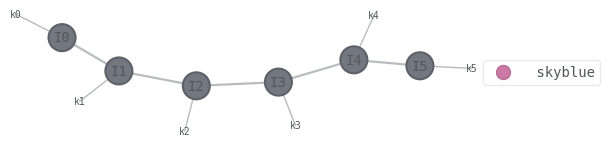


🔹 Contracting MPS:
✅ Final contracted state shape: (2, 2, 2, 2, 2, 2)

🔹 Plotting Entanglement Entropy:


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


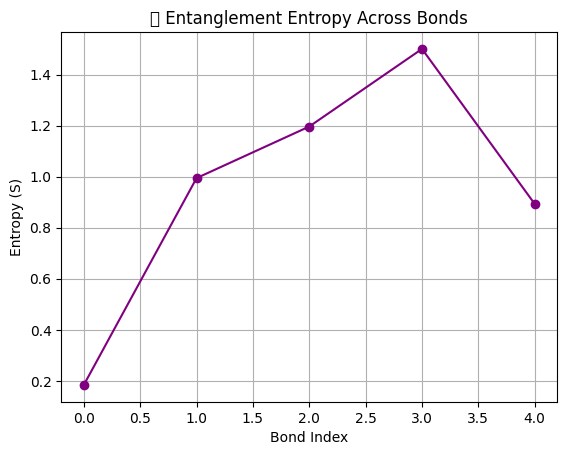


🔹 Compressing 1st tensor in MPS:
✅ Compressed tensor to rank-2, original shape: (2, 2)
Compressed tensor shape: (2, 2)


In [7]:
# Install required packages (only needed once in Colab)
!pip install -q opt_einsum quimb

import numpy as np
import opt_einsum as oe
import quimb as qu
import quimb.tensor as qtn
import matplotlib.pyplot as plt

# -------------------------------
# 1. Create Dummy MPS (Matrix Product State)
# -------------------------------
def create_dummy_mps(n_sites=6, phys_dim=2, bond_dim=3):
    mps = qtn.MPS_rand_state(n_sites, bond_dim, phys_dim=phys_dim)
    print(f"✅ Created random MPS with {n_sites} sites and bond dim {bond_dim}")
    return mps

# -------------------------------
# 2. Visualize Tensor Network
# -------------------------------
def plot_mps(mps):
    print("📌 Plotting tensor network...")
    mps.graph(color=['skyblue'] * len(mps.tensors))

# -------------------------------
# 3. Perform Full Contraction
# -------------------------------
def contract_mps(mps):
    final_state = mps.contract()
    print("✅ Final contracted state shape:", final_state.shape)
    return final_state

# -------------------------------
# 4. Compute Entanglement Entropy Across Bonds
# -------------------------------
def plot_entanglement_entropy(mps):
    entropy = []
    n_sites = mps.nsites
    for split in range(1, n_sites):  # valid bipartitions
        S = mps.entropy(split)
        entropy.append(S)
    plt.plot(entropy, marker='o', color='purple')
    plt.title('🧠 Entanglement Entropy Across Bonds')
    plt.xlabel('Bond Index')
    plt.ylabel('Entropy (S)')
    plt.grid(True)
    plt.show()

# -------------------------------
# 5. Tensor Compression Example
# -------------------------------
def compress_tensor(tensor, max_rank=2):
    U, s, Vh = np.linalg.svd(tensor.data.reshape(tensor.shape[0], -1), full_matrices=False)
    s = s[:max_rank]
    U = U[:, :max_rank]
    Vh = Vh[:max_rank, :]
    compressed = U @ np.diag(s) @ Vh
    print(f"✅ Compressed tensor to rank-{max_rank}, original shape: {tensor.shape}")
    return compressed

# -------------------------------
# Main Simulation Pipeline
# -------------------------------
def run_tensor_network_demo():
    mps = create_dummy_mps()

    print("\n🔹 Tensor Network Visualization:")
    plot_mps(mps)

    print("\n🔹 Contracting MPS:")
    final_state = contract_mps(mps)

    print("\n🔹 Plotting Entanglement Entropy:")
    plot_entanglement_entropy(mps)

    print("\n🔹 Compressing 1st tensor in MPS:")
    compressed_data = compress_tensor(mps[0])
    print("Compressed tensor shape:", compressed_data.shape)

# Run the demo
run_tensor_network_demo()


**Concept and execution by Bhadale IT, code generated by ChatGPT**